### Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import numpy as np
import seaborn as sns

### Importación de datos



In [2]:

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


### Exploración inicial de los dataframes

En esta fase se realiza una exploración de los datos contenidos en cada uno de los dataframes, con el objetivo de caracterizar las variables, ver valores nulos o faltantes, detectar inconsistencias en la presentación de los datos, entre otros.

#### Verificación de tipo de datos y valores nulos:

In [3]:
# Tipo de datos en el dataframe tienda:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [4]:
# Tipo de datos en el datafarme tienda2:
tienda2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [5]:
# Tipo de datos en el datafarme tienda3:
tienda3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [6]:
# Tipo de datos en el datafarme tienda4:
tienda4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2358 non-null   object 
 1   Categoría del Producto  2358 non-null   object 
 2   Precio                  2358 non-null   float64
 3   Costo de envío          2358 non-null   float64
 4   Fecha de Compra         2358 non-null   object 
 5   Vendedor                2358 non-null   object 
 6   Lugar de Compra         2358 non-null   object 
 7   Calificación            2358 non-null   int64  
 8   Método de pago          2358 non-null   object 
 9   Cantidad de cuotas      2358 non-null   int64  
 10  lat                     2358 non-null   float64
 11  lon                     2358 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.2+ KB


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes presentan una estructura similar.</li>
    <li> Los dataframes de tienda, tienda2 y tienda3 tienen unas dimensiones de 2359 filas y 12 columnas.</li>
    <li> El dataframe tienda4 tiene una dimensión de 2358 filas y 12 columnas.</li>
    <li> Ninguno de los dataframes tiene valores nulos.</li>
    <li> La columna 'Fecha de compra' tiene datos tipo str.</li>  
  </ul>
</div>


#### Verificación de variables categóricas:

In [7]:
# Verificación de consistencia de escritura de las categorías de 'Producto' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

tiendas_productos = {
    nombre:sorted(df['Producto'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, productos in tiendas_productos.items():
    print(f'Productos de la {nombre}: ')
    print(productos)
    print('---')

Productos de la Tienda 1: 
['Ajedrez de madera', 'Armario', 'Asistente virtual', 'Auriculares', 'Auriculares con micrófono', 'Balón de baloncesto', 'Balón de voleibol', 'Batería', 'Bicicleta', 'Bloques de construcción', 'Cama box', 'Cama king', 'Carrito de control remoto', 'Celular ABXY', 'Ciencia de datos con Python', 'Cubertería', 'Cubo mágico 8x8', 'Cuerda para saltar', 'Dashboards con Power BI', 'Dinosaurio Rex', 'Estufa', 'Guitarra acústica', 'Guitarra eléctrica', 'Impresora', 'Iniciando en programación', 'Iphone 15', 'Juego de mesa', 'Kit de bancas', 'Lavadora de ropa', 'Lavavajillas', 'Mesa de centro', 'Mesa de comedor', 'Mesa de noche', 'Microondas', 'Mochila', 'Modelado predictivo', 'Muñeca bebé', 'Olla de presión', 'Pandereta', 'Refrigerador', 'Secadora de ropa', 'Set de ollas', 'Set de vasos', 'Silla de oficina', 'Sillón', 'Smart TV', 'Smartwatch', 'Sofá reclinable', 'TV LED UHD 4K', 'Tablet ABXY', 'Vaso térmico']
---
Productos de la Tienda 2: 
['Ajedrez de madera', 'Armario

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Producto'.</li>
    <li> No hay diferencias particulares en los productos que venden cada una de las tiendas. </li> 
  </ul>
</div>

In [8]:
# Verificación de consistencia de escritura de las categorías de 'Categoría del Producto' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

tiendas_cat_prod = {
    nombre:sorted(df['Categoría del Producto'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, categoria in tiendas_cat_prod.items():
    print(f'Categorías del Producto de la {nombre}: ')
    print(categoria)
    print('---')

Categorías del Producto de la Tienda 1: 
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
---
Categorías del Producto de la Tienda 2: 
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
---
Categorías del Producto de la Tienda 3: 
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
---
Categorías del Producto de la Tienda 4: 
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
---


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Categoría del Producto'.</li>
    <li> No hay diferencias particulares en las categorías de productos que venden cada una de las tiendas. </li> 
  </ul>
</div>

In [9]:
# Verificación de consistencia de escritura de las categorías de 'Vendedor' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

tiendas_vendedores = {
    nombre:sorted(df['Vendedor'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, vendedor in tiendas_vendedores.items():
    print(f'Vendedores de la {nombre}: ')
    print(vendedor)
    print('---')

Vendedores de la Tienda 1: 
['Beatriz Morales', 'Blanca Ramirez', 'Camila Rivera', 'Felipe Santos', 'Izabela de León', 'Juan Fernandez', 'Juliana Costa', 'Lucas Olivera', 'Maria Alfonso', 'Mariana Herrera', 'Pedro Gomez', 'Rafael Acosta', 'Santiago Silva', 'Ángel Rodriguez']
---
Vendedores de la Tienda 2: 
['Beatriz Morales', 'Blanca Ramirez', 'Camila Rivera', 'Felipe Santos', 'Izabela de León', 'Juan Fernandez', 'Juliana Costa', 'Lucas Olivera', 'Maria Alfonso', 'Mariana Herrera', 'Pedro Gomez', 'Rafael Acosta', 'Santiago Silva', 'Ángel Rodriguez']
---
Vendedores de la Tienda 3: 
['Beatriz Morales', 'Blanca Ramirez', 'Camila Rivera', 'Felipe Santos', 'Izabela de León', 'Juan Fernandez', 'Juliana Costa', 'Lucas Olivera', 'Maria Alfonso', 'Mariana Herrera', 'Pedro Gomez', 'Rafael Acosta', 'Santiago Silva', 'Ángel Rodriguez']
---
Vendedores de la Tienda 4: 
['Beatriz Morales', 'Blanca Ramirez', 'Camila Rivera', 'Felipe Santos', 'Izabela de León', 'Juan Fernandez', 'Juliana Costa', 'Lucas

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Vendedor'.</li>
    <li> El mismo personal rota por las 4 tiendas. </li> 
  </ul>
</div>

In [10]:
# Verificación de consistencia de escritura de las categorías de 'Lugar de Compra' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

tiendas_lugares = {
    nombre:sorted(df['Lugar de Compra'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, lugar in tiendas_lugares.items():
    print(f'Lugares de compra de la {nombre}: ')
    print(lugar)
    print('---')

Lugares de compra de la Tienda 1: 
['Armenia', 'Barranquilla', 'Bogotá', 'Bucaramanga', 'Cali', 'Cartagena', 'Cúcuta', 'Inírida', 'Leticia', 'Manizales', 'Medellín', 'Neiva', 'Pasto', 'Pereira', 'Riohacha', 'Santa Marta', 'Soacha', 'Valledupar', 'Villavicencio']
---
Lugares de compra de la Tienda 2: 
['Armenia', 'Barranquilla', 'Bogotá', 'Bucaramanga', 'Cali', 'Cartagena', 'Cúcuta', 'Inírida', 'Leticia', 'Manizales', 'Medellín', 'Neiva', 'Pasto', 'Pereira', 'Riohacha', 'Santa Marta', 'Soacha', 'Valledupar', 'Villavicencio']
---
Lugares de compra de la Tienda 3: 
['Armenia', 'Barranquilla', 'Bogotá', 'Bucaramanga', 'Cali', 'Cartagena', 'Cúcuta', 'Inírida', 'Leticia', 'Manizales', 'Medellín', 'Neiva', 'Pasto', 'Pereira', 'Riohacha', 'Santa Marta', 'Soacha', 'Valledupar', 'Villavicencio']
---
Lugares de compra de la Tienda 4: 
['Armenia', 'Barranquilla', 'Bogotá', 'Bucaramanga', 'Cali', 'Cartagena', 'Cúcuta', 'Inírida', 'Leticia', 'Manizales', 'Medellín', 'Neiva', 'Pasto', 'Pereira', 'Rio

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Lugar de Compra'.</li>
    <li> Las 4 tiendas realizan envíos a las mismas ciudades. </li> 
  </ul>
</div>

In [11]:
# Verificación de consistencia de escritura de las categorías de 'Método de pago' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

tiendas_metodo_pago = {
    nombre:sorted(df['Método de pago'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, metodo in tiendas_metodo_pago.items():
    print(f'Los métodos de pago considerados en la {nombre} son: ')
    print(metodo)
    print('---')

Los métodos de pago considerados en la Tienda 1 son: 
['Cupón', 'Nequi', 'Tarjeta de crédito', 'Tarjeta de débito']
---
Los métodos de pago considerados en la Tienda 2 son: 
['Cupón', 'Nequi', 'Tarjeta de crédito', 'Tarjeta de débito']
---
Los métodos de pago considerados en la Tienda 3 son: 
['Cupón', 'Nequi', 'Tarjeta de crédito', 'Tarjeta de débito']
---
Los métodos de pago considerados en la Tienda 4 son: 
['Cupón', 'Nequi', 'Tarjeta de crédito', 'Tarjeta de débito']
---


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Método de pago'.</li>
    <li> Las 4 tiendas aceptan los mismos métodos de pago. </li> 
  </ul>
</div>

<div style="background-color:rgb(230, 245, 244); border: 1px solid #116A7B; border-radius: 5px; overflow: hidden;">
  <div style="background-color:rgb(188, 216, 213); color:rgb(17, 82, 91); padding: 6px 10px; font-weight: bold;">
    Conclusiones de la exploración inicial
  </div>
  <div style="color: #116A7B; padding: 10px;">
    <ul>
        <li>Todas las tiendas tienen características similares en cuanto a tipo de productos ofrecidos, lugares de venta, medios de pago aceptados y personal. No hay una característica diferenciadora que, a primera vista, haga destacar una tienda sobre otra. </li>
        <li>La tienda4 ha realizado 1 venta menos (2358 registros) que las demás tiendas (2359 registros).</li>
        <li>Para realizar el análsis de la evolución de ventas en el tiempo es necesario convertir la columna 'Fecha de Compra' de tipo str (object) a tipo fecha (datetime).</li>
        <li>Las variables categóricas de los dataframes no presentan inconsistencias de escritura.</li>
        <li>No se observan valores nulos o faltantes en ninguno de los dataframes.</li>
    </ul>
  </div>
</div>

### Limpieza de datos

En esta fase sólo se convertirá la columna 'Fecha de Compra' de tipo str a tipo date para permitir un análisis posterior.

In [12]:
# Cambio de tipo de dato de la columna 'Fecha de Compra' de los dataframes tienda, tienda2, tienda3 y tienda4.
tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

for nombre, df in tiendas_df.items():
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], format='%d/%m/%Y')
    print(f'El tipo de dato de la columna "Fecha de Compra" de la {nombre} es: ')
    print(f'{df["Fecha de Compra"].dtype.name}')
    print('---')

El tipo de dato de la columna "Fecha de Compra" de la Tienda 1 es: 
datetime64[ns]
---
El tipo de dato de la columna "Fecha de Compra" de la Tienda 2 es: 
datetime64[ns]
---
El tipo de dato de la columna "Fecha de Compra" de la Tienda 3 es: 
datetime64[ns]
---
El tipo de dato de la columna "Fecha de Compra" de la Tienda 4 es: 
datetime64[ns]
---


In [13]:
# Rango de tiempo de ventas registradas
tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

for nombre, df in tiendas_df.items():
    fecha_min = df['Fecha de Compra'].min()
    fecha_max = df['Fecha de Compra'].max()
    print(f'El rango de ventas registradas de la {nombre} es de {fecha_min} a {fecha_max}')
    print('---')

El rango de ventas registradas de la Tienda 1 es de 2020-01-01 00:00:00 a 2023-03-31 00:00:00
---
El rango de ventas registradas de la Tienda 2 es de 2020-01-01 00:00:00 a 2023-03-31 00:00:00
---
El rango de ventas registradas de la Tienda 3 es de 2020-01-01 00:00:00 a 2023-03-31 00:00:00
---
El rango de ventas registradas de la Tienda 4 es de 2020-01-01 00:00:00 a 2023-03-30 00:00:00
---


In [14]:
# Creación de la columna año, mes y tienda en cada dataframe
for nombre, df in tiendas_df.items():
    df['Tienda'] = nombre
    print(f'{nombre}: ')
    print(f'{df[ "Tienda"]}')
    print('  ')

Tienda 1: 
0       Tienda 1
1       Tienda 1
2       Tienda 1
3       Tienda 1
4       Tienda 1
          ...   
2354    Tienda 1
2355    Tienda 1
2356    Tienda 1
2357    Tienda 1
2358    Tienda 1
Name: Tienda, Length: 2359, dtype: object
  
Tienda 2: 
0       Tienda 2
1       Tienda 2
2       Tienda 2
3       Tienda 2
4       Tienda 2
          ...   
2354    Tienda 2
2355    Tienda 2
2356    Tienda 2
2357    Tienda 2
2358    Tienda 2
Name: Tienda, Length: 2359, dtype: object
  
Tienda 3: 
0       Tienda 3
1       Tienda 3
2       Tienda 3
3       Tienda 3
4       Tienda 3
          ...   
2354    Tienda 3
2355    Tienda 3
2356    Tienda 3
2357    Tienda 3
2358    Tienda 3
Name: Tienda, Length: 2359, dtype: object
  
Tienda 4: 
0       Tienda 4
1       Tienda 4
2       Tienda 4
3       Tienda 4
4       Tienda 4
          ...   
2353    Tienda 4
2354    Tienda 4
2355    Tienda 4
2356    Tienda 4
2357    Tienda 4
Name: Tienda, Length: 2358, dtype: object
  


<div style="background-color:rgb(230, 245, 244); border: 1px solid #116A7B; border-radius: 5px; overflow: hidden;">
  <div style="background-color:rgb(188, 216, 213); color:rgb(17, 82, 91); padding: 6px 10px; font-weight: bold;">
      Conclusiones de la limpieza de datos
  </div>
  <div style="color: #116A7B; padding: 10px;">
    <ul>
        <li> Se cambió satisfactoriamente en los 4 dataframes el tipo de dato de la columna 'Fecha de Compra' de tipo str a tipo date.  </li>
        <li> Las ventas de las tiendas se han registrado desde 01/01/2020 al 31/03/2023, excepto en la tienda 4 que se registró hasta un día antes (30/03/2023).</li>
        <li> Se creó la columna 'Tienda' para identifcar la tienda a la que pertenece la data cuando se requiera juntar los dataframes. </li>
        <li> Con los dataframes explorados y limpios, se procede a la fase de análisis.</li>
    </ul>
  </div>
</div>

### Análisis de datos

#### Análisis de la facturación:



##### Facturación total

Se realizó el análisis de la facturación total de cada tienda en todos los años de los que se tiene registros (enero 2020 - marzo 2023)

In [15]:
tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

# Calculo del total de ventas en cada tienda
for nombre, df in tiendas_df.items():
    total_ventas = float(df['Precio'].sum())
    print(f'El total de ventas de la {nombre} es {total_ventas}')
    print('---')


El total de ventas de la Tienda 1 es 1150880400.0
---
El total de ventas de la Tienda 2 es 1116343500.0
---
El total de ventas de la Tienda 3 es 1098019600.0
---
El total de ventas de la Tienda 4 es 1038375700.0
---


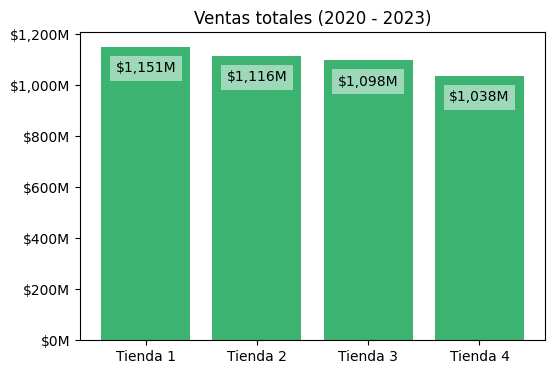

In [16]:
tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

# Calculo de la suma total de ventas en cada dataframe
totales_por_tienda = {}

for nombre, df in tiendas_df.items():
    ventas_totales = df['total_ventas'] = df['Precio'].sum()
    totales_por_tienda[nombre] = ventas_totales

# Definición de las variables a ser graficadas
x = list(totales_por_tienda.keys())
y = list(totales_por_tienda.values())

# Aplicar formato a números
def millones(x, pos=None):
    """
    Esta función convierte un número y le da formato de millones (M) sin decimales
    """
    return f'${x/1_000_000:,.0f}M'

# Realizar gráfica de suma total de ventas por tienda
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(x, y, color = 'mediumseagreen')

# Uso de la función millones para formatear números en el eje y
ax.yaxis.set_major_formatter(FuncFormatter(millones))

ax.set_title("Ventas totales (2020 - 2023)")

# Generar etiquetas en las barras
# Uso de la función millones para formatear las etiquetas de las barras
for i, v in enumerate(y):
    ax.text(i, v-100_000_000, millones(v), ha='center', bbox = {'facecolor':'white', 'alpha':0.5, 'edgecolor':'None'})

plt.show()


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Las 4 tiendas han tenido ventas totales por más de 1000 millones entre 2020 y 2023.</li>
    <li> La tienda 1 ha reportado las mayores ventas totales, por un valor de 1151 millones. </li>
    <li> La tienda 4 ha reportado las menores ventas totales, por un valor de 1038 millones.</li> 
  </ul>
</div>

##### Facturación por año

Para realizar el análisis de facturación por año, sólo se escogieron los años que tenían registro de ventas en sus 12 meses para evitar la generación de sesgos (2020 - 2022).

In [17]:
# Tabla resumen de ventas por año (2020 - 2022) y por tienda

# Combinacíon de dataframes
df_combinados = pd.concat([tienda, tienda2, tienda3, tienda4])

# Filtrado de filas pertenecientes a los años 2020 - 2022
df_combinados_2022 = df_combinados.loc[df_combinados['Fecha de Compra'].dt.year.isin([2020, 2021, 2022])]

# Creación de la tabla resumen
ventas_ano = pd.pivot_table(df_combinados_2022, values = 'Precio', index = 'Fecha de Compra', columns = 'Tienda', aggfunc = 'sum', fill_value = 0)
ventas_ano = ventas_ano.resample('YE').sum()
ventas_ano

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Fecha de Compra,,,,
2020-12-31,368933200.0,320466600.0,321707500.0,330847700.0
2021-12-31,362120800.0,351215500.0,362954400.0,347823600.0
2022-12-31,316565600.0,358226500.0,350438300.0,302221500.0


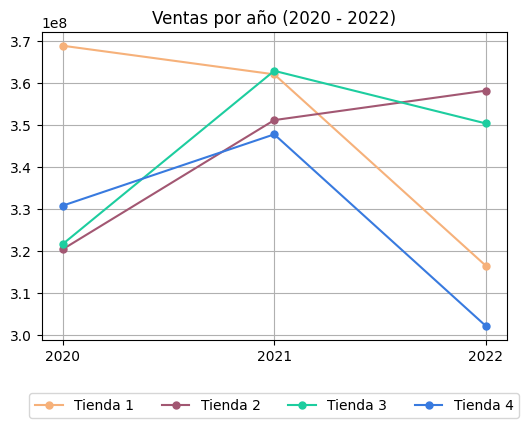

In [18]:
# Gráfica de ventas totales por año

# Creación del gráfico
fig, ax = plt.subplots(figsize = (6,4))

# Formatear con un color y un marcador determinados cada línea graficada:
colores = ['#F6B17A', '#A25772', '#1DCD9F', '#387ADF']
for color, columna in zip(colores, ventas_ano.columns):
    ax.plot(ventas_ano.index, ventas_ano[columna], label=columna, color=color, linewidth=1.5, marker='o', markersize=5)

ax.set_title('Ventas por año (2020 - 2022)')
ax.set_xticks(ventas_ano.index)
ax.set_xticklabels(ventas_ano.index.strftime('%Y'))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
ax.grid(True)
plt.show()

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Hay una caída abrupta en las ventas de la tienda 1 y la tienda 4 en el 2022.</li>
    <li> Se observa una caída ligera en las ventas de la tienda 3 en el 2022 con respecto al 2021.</li>
    <li> La única tienda que ha tenido un crecimiento consistente es la tienda 2.</li>
  </ul>
</div>

##### Facturación por mes

Se realizó el análisis de facturación por mes para detectar temporadas de alta y baja demanda.

In [19]:
# Crear una copia del dataframe combinado
df_combinados_1 = df_combinados.copy()

# Establecer como indice la columna 'Fecha de Compra'
df_combinados_1 = df_combinados_1.set_index('Fecha de Compra')

# Crear la tabla resumen de ventas por día y tienda
ventas_dia = pd.pivot_table(df_combinados_1, values='Precio', index='Fecha de Compra', columns='Tienda', aggfunc='sum', fill_value=0)
ventas_dia.head()

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Fecha de Compra,,,,
2020-01-01,1440000.0,139900.0,96300.0,65400.0
2020-01-02,1707900.0,0.0,37300.0,50200.0
2020-01-03,2323000.0,1220800.0,2715700.0,511600.0
2020-01-04,401100.0,499000.0,740100.0,1041600.0
2020-01-05,0.0,157200.0,44100.0,714600.0


In [20]:
# Crear tabla resumen con ventas por mes
ventas_mes = ventas_dia.resample('ME').sum()
ventas_mes.head()

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Fecha de Compra,,,,
2020-01-31,33084300.0,31129500.0,23782900.0,19298700.0
2020-02-29,40054000.0,17388800.0,27577000.0,22880400.0
2020-03-31,31562300.0,30515900.0,30024400.0,28533100.0
2020-04-30,33666100.0,27646600.0,35343500.0,39492700.0
2020-05-31,38582900.0,25462300.0,26123800.0,31991400.0


In [21]:
# Cálculo de la media movil cada 6 meses
media_movil = ventas_mes.rolling(window=6).mean()
media_movil.head(10)

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Fecha de Compra,,,,
2020-01-31,NaN,NaN,NaN,NaN
2020-02-29,NaN,NaN,NaN,NaN
2020-03-31,NaN,NaN,NaN,NaN
2020-04-30,NaN,NaN,NaN,NaN
2020-05-31,NaN,NaN,NaN,NaN
2020-06-30,3.387438e+07,2.636653e+07,2.671932e+07,2.817492e+07
2020-07-31,3.420792e+07,2.510287e+07,2.835597e+07,2.944597e+07
2020-08-31,3.272000e+07,2.611687e+07,2.807240e+07,3.083378e+07
2020-09-30,3.250025e+07,2.621893e+07,2.751310e+07,3.077827e+07


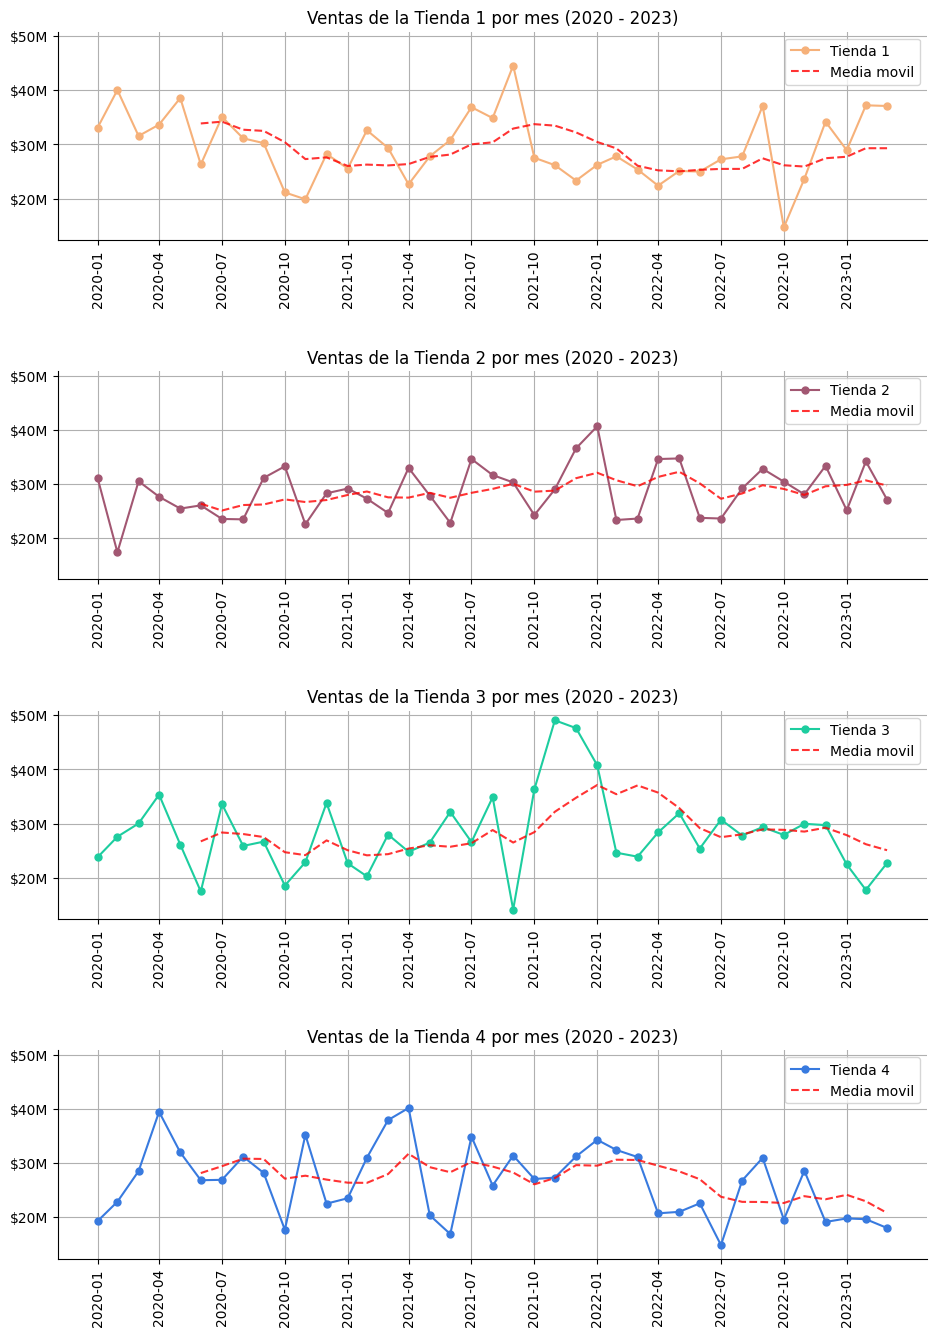

In [22]:
# Grafica de ventas por mes (2020 - 2023) por tienda
fig, ax = plt.subplots(4, 1, figsize=(10,14), sharey=True)

# Colores a usar en las gráficas
colores = ['#F6B17A', '#A25772', '#1DCD9F', '#387ADF']

# Lista de divisiones en el eje x
marcas_x = ventas_mes.index[0:len(ventas_mes)+1:3]

# Lista de posiciones a resaltar
fechas_enero = ventas_mes.index[ventas_mes.index.month == 1]


for a, color, columna in zip(ax, colores, ventas_mes.columns):

    # Creacion y personalizacion de las gráficas
    a.plot(ventas_mes.index, ventas_mes[columna], label=columna, color=color, marker='o', markersize=5)

    # Graficar las medias móviles
    a.plot(media_movil.index, media_movil[columna], label='Media movil', color='red', alpha=0.8, linestyle='--')

    # Formateo del título de las gráficas
    a.set_title(f'Ventas de la {columna} por mes (2020 - 2023)')

    # Formateo de los valores del eje y
    a.yaxis.set_major_formatter(FuncFormatter(millones))

    # Quitar los bordes derecho y superior de las gráficas
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)

    # Establecer las divisiones en las marcar establecidas
    a.set_xticks(marcas_x)

    # Rotar 90 grados las etiquetas
    a.tick_params(axis='x', rotation=90)

    # Establecer un formato de año-mes en las etiquetas
    a.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # Establecer las líneas guía
    a.grid(True, which='major')

    # Leyenda de la gráfica
    a.legend()


plt.tight_layout(pad=3)
plt.show()



<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> La Tienda 1 presenta caída en las ventas en los meses de octubre y en los últimos 2 años presenta picos en septiembre.</li>
    <li> La media de ventas de la Tienda 1 ha tendido a disminuir ligeramente. </li>
    <li> La Tienda 2 es la tienda que tiene más consistencia en el monto de ventas a lo largo de los años y presenta una ligera tendencia al crecimiento.</li>
    <li> Las ventas de la Tienda 3 se han mantenido en general, a pesar de tener varias fluctuaciones.</li>
    <li> El promedio de ventas de la Tienda 4 tienen una tendencia a disminuir. </li>
  </ul>
</div>

<div style="background-color:rgb(230, 245, 244); border: 1px solid #116A7B; border-radius: 5px; overflow: hidden;">
  <div style="background-color:rgb(188, 216, 213); color:rgb(17, 82, 91); padding: 6px 10px; font-weight: bold;">
      Conclusiones del análisis de la facturación
  </div>
  <div style="color: #116A7B; padding: 10px;">
    <ul>
        <li> Las Tiendas 2 y 3 presentan la mayor consistencia en facturación. </li>
        <li> La Tienda 1 ha tenido una caída en la venta media.</li>
        <li> La Tienda 4 tiene el peor performance en facturación, obteniendo la menor cantidad acumulada facturada, caídas abruptas en las ventas en el último año y una tendencia a la baja. </li>
    </ul>
  </div>
</div>

#### Ventas por categoría

In [23]:
# Facturación total por categoría
df_combinados_2 = df_combinados.copy()
ventas_categoria = pd.pivot_table(df_combinados_2, values='Precio', index='Categoría del Producto', columns='Tienda', aggfunc='sum', fill_value=0)
ventas_categoria.head()

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,12698400.0,14746900.0,15060000.0,15074500.0
Deportes y diversión,39290000.0,34744500.0,35593100.0,33350100.0
Electrodomésticos,363685200.0,348567800.0,329237900.0,283260200.0
Electrónicos,429493500.0,410831100.0,410775800.0,409476100.0
Instrumentos musicales,91299000.0,104990300.0,77380900.0,75102400.0


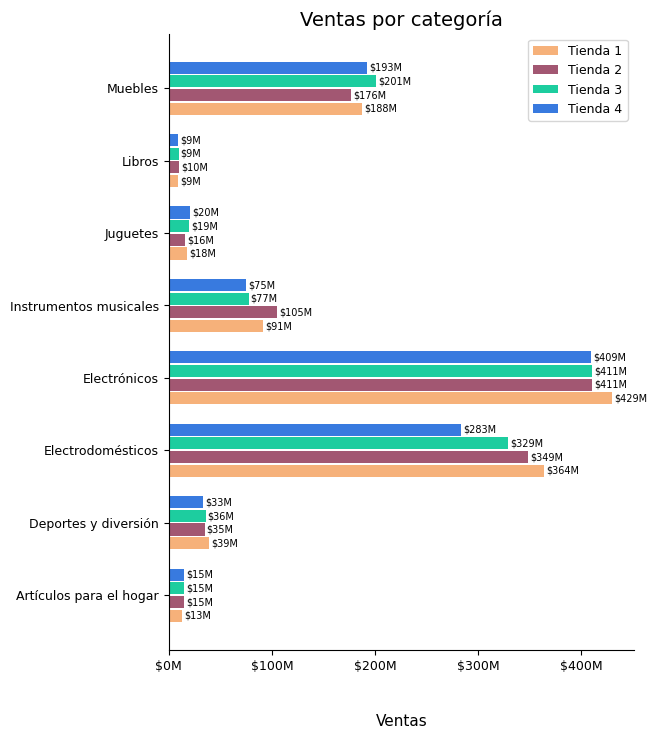

In [24]:
# Gráfica de ventas por categoría

categorias = ventas_categoria.index
tiendas = ventas_categoria.columns
num_tiendas = len(tiendas)
y = np.arange(len(categorias))*3

ancho_barra = 0.5
espacio = np.linspace(-ancho_barra*1.7, ancho_barra*1.7, num_tiendas)

# Colores a usar en las gráficas
colores = ['#F6B17A', '#A25772', '#1DCD9F', '#387ADF']

fig, ax = plt.subplots(figsize = (6,8))

for i, t, color in zip(range(0,4),tiendas, colores):

    posicion_y = y+espacio[i]

    # Generacíon de las barras
    ax.barh(posicion_y, ventas_categoria[t], height = ancho_barra, label = t, color=color)
    
    # Agregar etiquetas
    for j, venta in enumerate(ventas_categoria[t]):
        venta_formateada = millones(venta)
        ax.text(venta+2_000_000, posicion_y[j], f'{venta_formateada}', va='center', fontsize=7)


ax.set_yticks(y)
ax.set_yticklabels(categorias, fontsize=9)
ax.xaxis.set_major_formatter(FuncFormatter(millones))
ax.set_xlabel('Ventas', labelpad=30, fontsize=11)
ax.tick_params(axis='x', labelsize=9)
ax.set_title('Ventas por categoría', fontsize=14)
ax.legend(fontsize=9)
ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout
plt.show()

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Las categorías de productos más vendidas son electronicos, electrodomésticos y muebles.</li>
    <li> La Tienda 1 lidera las ventas en 2 de las 3 categorías más vendidas.</li>
    <li> La Tienda 4 está en último lugar de ventas en 2 de las 3 categorías más vendidas.</li>
    <li> Las ventas en las demás categorías tienen poco impacto para diferenciar la eficacia de ventas entre las tiendas.</li>
  </ul>
</div>

- Ventas por año de las 3 catogorías más vendidas: el análisis se realizará a las categorías electrodomésticos, electrónicos y muebles entre los años 2020 y 2022 (tienen registro completo de ventas anuales)

In [25]:
# Análisis de las ventas por año de electrodomésticos

# Creación de la tabla de venta de electrodomésticos por año
df_electrodomesticos = df_combinados_2.loc[(df_combinados_2['Categoría del Producto'] == 'Electrodomésticos') & (df_combinados_2['Fecha de Compra'].dt.year.isin([2020, 2021, 2022]))]
venta_electrodomesticos = pd.pivot_table(df_electrodomesticos, values='Precio', index='Fecha de Compra', columns='Tienda', aggfunc='sum', fill_value=0)

# Agrupación de ventas de electrodomésticos por año
venta_electrodomesticos = venta_electrodomesticos.resample('YE').sum()
venta_electrodomesticos

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Fecha de Compra,,,,
2020-12-31,136132300.0,112443300.0,94273200.0,80890500.0
2021-12-31,107352800.0,112255600.0,115076200.0,100643000.0
2022-12-31,95565700.0,101885600.0,102092000.0,87090100.0


In [26]:
# Análisis de las ventas por año de productos electrónicos

# Creación de la tabla de venta de productos electrónicos por año
df_electronicos = df_combinados_2.loc[(df_combinados_2['Categoría del Producto'] == 'Electrónicos') & (df_combinados_2['Fecha de Compra'].dt.year.isin([2020, 2021, 2022]))]
venta_electronicos = pd.pivot_table(df_electronicos, values='Precio', index='Fecha de Compra', columns='Tienda', aggfunc='sum', fill_value=0)

# Agrupación de ventas de electrodomésticos por año
venta_electronicos = venta_electronicos.resample('YE').sum()
venta_electronicos

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Fecha de Compra,,,,
2020-12-31,129728600.0,105710100.0,124495300.0,136151000.0
2021-12-31,145941800.0,128888100.0,131232900.0,153352000.0
2022-12-31,106458600.0,141259600.0,140745600.0,97832500.0


In [27]:
# Análisis de las ventas por año de muebles

# Creación de la tabla de venta de muebles por año
df_muebles = df_combinados_2.loc[(df_combinados_2['Categoría del Producto'] == 'Muebles') & (df_combinados_2['Fecha de Compra'].dt.year.isin([2020, 2021, 2022]))]
ventas_muebles = pd.pivot_table(df_muebles, values='Precio', index='Fecha de Compra', columns='Tienda', aggfunc='sum', fill_value=0)

# Agrupación de ventas de electrodomésticos por año
ventas_muebles = ventas_muebles.resample('YE').sum()
ventas_muebles

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Fecha de Compra,,,,
2020-12-31,50778700.0,53593000.0,63217900.0,63813700.0
2021-12-31,59760800.0,53346500.0,61369400.0,53093300.0
2022-12-31,57180100.0,55396800.0,60764800.0,62414100.0


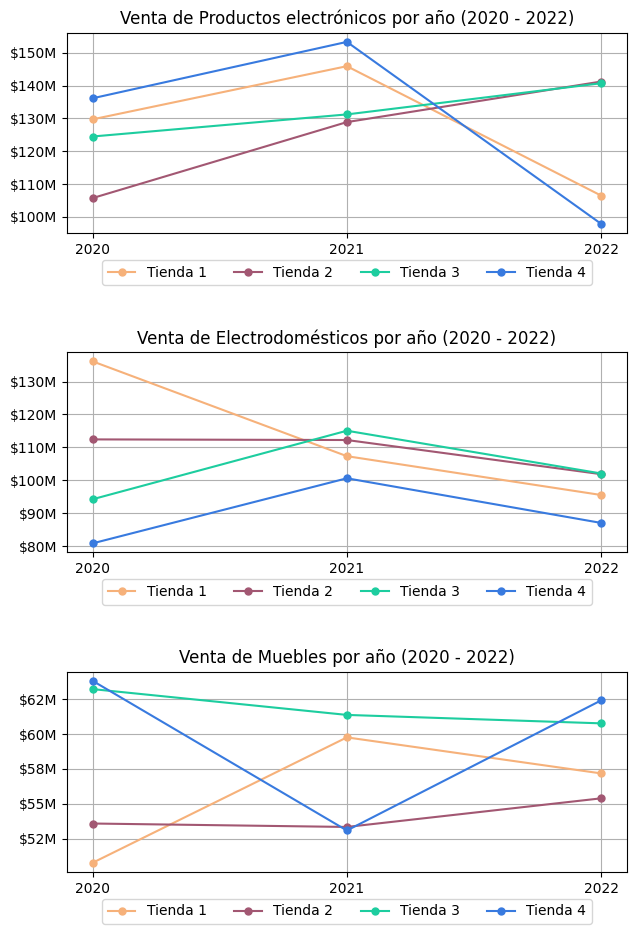

In [28]:
# Gráfica de las ventas de los productos más vendidos por año

fig, ax = plt.subplots(nrows=3, figsize=(7,10))

# Lista de dataframes a utilizar en las gráficas
df_ventas = [venta_electronicos, venta_electrodomesticos, ventas_muebles]
# Lista de los nombres de los dataframes
df_nombres = ['Productos electrónicos', 'Electrodomésticos', 'Muebles']
# Lista de colores por tienda
colores = ['#F6B17A', '#A25772', '#1DCD9F', '#387ADF']



for a, df, nombre in zip(ax, df_ventas, df_nombres):
    for t, color in zip(df, colores):
        a.plot(df.index, df[t], color=color, label=t, marker='o', markersize=5)

        # Establecer el título de cada gráfica
        a.set_title(f'Venta de {nombre} por año (2020 - 2022)')

        # Formatear los valores de las etiquetas del eje y
        a.yaxis.set_major_formatter(FuncFormatter(millones))
        
        # Marcas en el eje x
        marcas_x = df.index

        # Cambiar las marcas mostradas en el eje x
        a.set_xticks(marcas_x)

        # Formatear los valores de las etiquetas del eje x
        a.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

        # Mostrar la leyenda en cada gráfico
        a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncols=4)

        # Mostrar gradilla
        a.grid(True)


plt.tight_layout(pad=3)
plt.show()

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> La Tienda 1 y la Tienda 4 en el 2022 tuvieron un gran descenso en ventas de productos de la categoría de productos elctrónicos, que es la categoría que más se vende entre las 4 tiendas.</li>
    <li> La venta de electrodomésticos bajó en las 4 tiendas en el 2022</li>
    <li> Las tiendas 2 y 3 lideran en el 2022 la venta en 2 de las 3 categorías. </li>
    <li> La Tienda 4 lideró la venta de muebles en el 2022.</li>
  </ul>
</div>

In [ ]:
# Cantidad de ventas por categoría
conteo_ventas_categoria = pd.pivot_table(df_combinados_2, index='Categoría del Producto', columns='Tienda', aggfunc='size', fill_value=0)
conteo_ventas_categoria

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


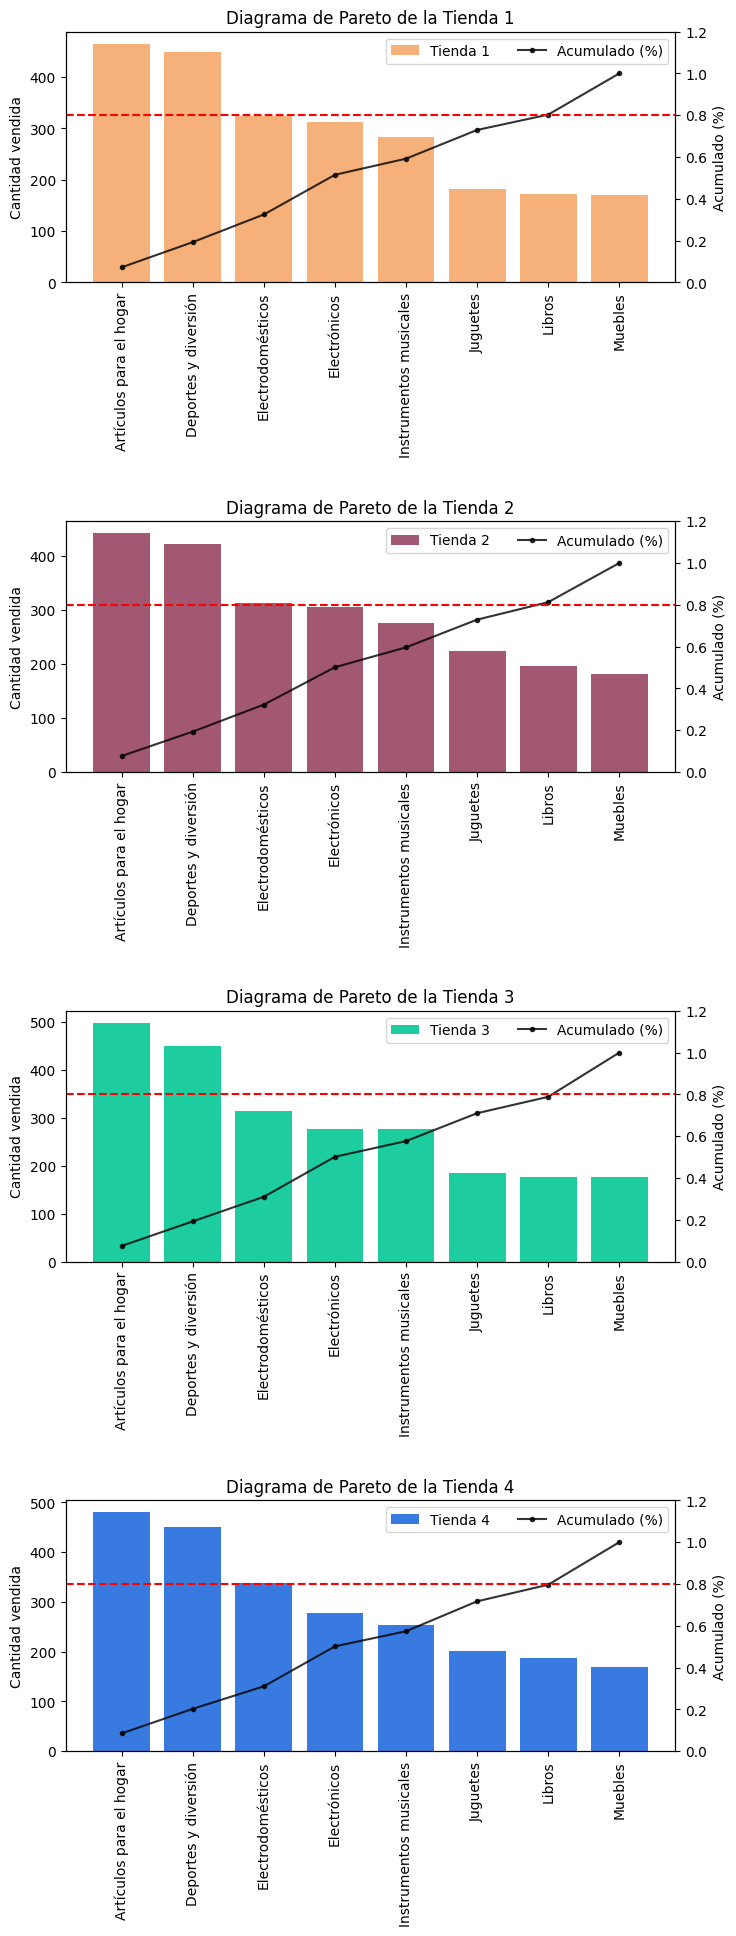

In [94]:
# Diagrama de Pareto

fig, axes = plt.subplots(nrows=4, figsize=(8,20))

# Ejes a graficar
eje_x = conteo_ventas_categoria.index
nombres_tiendas = conteo_ventas_categoria.columns

# Lista de colores por tienda
colores = ['#F6B17A', '#A25772', '#1DCD9F', '#387ADF']

for i, t, c in zip(range(0, 4), nombres_tiendas, colores):

    eje_y = conteo_ventas_categoria[t]

    # Generar los dos ejes y en cada gráfica
    ax = axes[i]
    ax2 = ax.twinx()
    ax2.set_ylim(0, 1.2)

    # Dibujar las barras por categoría en orden descendente
    ax.bar(eje_x, eje_y.sort_values(ascending=False), color=c, label=t)
    ax.tick_params(axis='x', labelrotation=90)

    # Dibujar la línea de frecuencia relativa acumulada
    ax2.plot(eje_x, eje_y.cumsum()/eje_y.sum(), color='black', alpha=0.8, label='Acumulado (%)', marker='o', markersize=3)

    # Dibujar la línea de corte al 80%
    ax2.axhline(0.8, color='red', linestyle='--')

    # Título de la gráfica
    axes[i].set_title(f'Diagrama de Pareto de la {t}')

    # Títulos de los ejes y
    ax.set_ylabel('Cantidad vendida')
    ax2.set_ylabel('Acumulado (%)')

    # Mostrar leyendas combinadas
    objeto1, etiqueta1 = ax.get_legend_handles_labels()
    objeto2, etiqueta2 = ax2.get_legend_handles_labels()

    objetos = objeto1 + objeto2
    etiquetas = etiqueta1 + etiqueta2

    ax2.legend(objetos, etiquetas, loc='upper right', ncols=2)

plt.tight_layout(pad=3)
plt.show()

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los productos de artículos para el hogar son los más vendidos en volumen en las 4 tiendas. </li>
    <li> Las 4 tiendas tienen un patrón de demanda similar en relación a las categorías de productos ofertadas.</li>
  </ul>
</div>

<div style="background-color:rgb(230, 245, 244); border: 1px solid #116A7B; border-radius: 5px; overflow: hidden;">
  <div style="background-color:rgb(188, 216, 213); color:rgb(17, 82, 91); padding: 6px 10px; font-weight: bold;">
      Conclusiones del análisis de ventas por categoría
  </div>
  <div style="color: #116A7B; padding: 10px;">
    <ul>
        <li> Las 4 tiendas tienen un mismo patrón de ventas. </li>
        <li> Las Tiendas 1 y 4 tienen las menores ventas en 2 de las 3 categorías más importantes. </li>
        <li> Las fluctuaciones en ventas de las Tiendas 2 y 3 son menores a las observadas en las Tiendas 1 y 4.</li>
    </ul>
  </div>
</div>

#### Calificación promedio de la tienda


In [30]:
# Calificación promedio por tienda por año

calificacion_tienda = pd.pivot_table(df_combinados_2, values='Calificación', index='Fecha de Compra', columns='Tienda', aggfunc='mean')
calificacion_tienda = calificacion_tienda.resample('YE').mean()
calificacion_tienda.index = calificacion_tienda.index.year
calificacion_tienda


Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Fecha de Compra,,,,
2020,3.919417,3.985155,4.080484,4.030028
2021,3.977403,3.995562,3.905124,3.981696
2022,4.059926,4.127650,4.118962,3.918746
2023,4.001778,3.980864,4.082278,4.203653


In [31]:
# Redondear calificación media
calificacion_tienda = calificacion_tienda.round(2)
calificacion_tienda

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Fecha de Compra,,,,
2020,3.92,3.99,4.08,4.03
2021,3.98,4.00,3.91,3.98
2022,4.06,4.13,4.12,3.92
2023,4.00,3.98,4.08,4.20


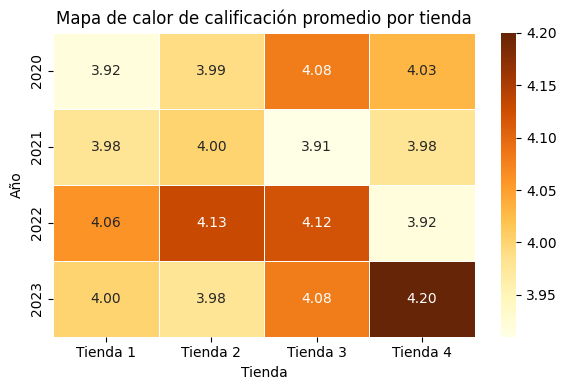

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(calificacion_tienda, cmap='YlOrBr', annot=True, fmt='.2f', linewidths=0.5)

plt.title('Mapa de calor de calificación promedio por tienda', fontsize=12)
plt.xlabel('Tienda')
plt.ylabel('Año')
plt.tight_layout()
plt.show()

<div style="background-color:rgb(230, 245, 244); border: 1px solid #116A7B; border-radius: 5px; overflow: hidden;">
  <div style="background-color:rgb(188, 216, 213); color:rgb(17, 82, 91); padding: 6px 10px; font-weight: bold;">
    Conclusiones del análisis de calificación por tienda
  </div>
  <div style="color: #116A7B; padding: 10px;">
    <ul>
        <li> Hay una mejora global en la calificación desde el 2022. </li>
        <li> La Tienda 2 tiene las calificaciones más consistentes a lo largo de los años.</li>
        <li> Actualmente, la tienda mejor calificada es la Tienda 4. </li>
    </ul>
  </div>
</div>

#### Productos más y menos vendidos

In [33]:
ventas_productos = pd.pivot_table(df_combinados_2, index='Producto', columns='Tienda', aggfunc='size', fill_value=0)
ventas_productos.head()

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Producto,,,,
Ajedrez de madera,49,45,47,39
Armario,60,54,49,34
Asistente virtual,40,38,39,50
Auriculares,50,37,43,44
Auriculares con micrófono,33,44,39,42


In [93]:

# Lista de tiendas (columnas)
nombres_tiendas1 = ventas_productos.columns

# Para guardar datos filtrados
productos_seleccionados = pd.DataFrame()

# Recorremos cada tienda
for t in nombres_tiendas1:
    datos = ventas_productos[t]

    # Producto más vendido
    max_producto = datos.idxmax()
    max_valor = datos.max()

    # Producto menos vendido
    min_producto = datos.idxmin()
    min_valor = datos.min()

    # Generación del nuevo DataFrame
    productos_seleccionados.loc[max_producto, t] = max_valor
    productos_seleccionados.loc[min_producto, t] = min_valor

productos_seleccionados


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Armario,60.0,NaN,NaN,NaN
Auriculares con micrófono,33.0,NaN,NaN,NaN
Iniciando en programación,NaN,65.0,NaN,NaN
Juego de mesa,NaN,32.0,NaN,NaN
Kit de bancas,NaN,NaN,57.0,NaN
Bloques de construcción,NaN,NaN,35.0,NaN
Cama box,NaN,NaN,NaN,62.0
Guitarra eléctrica,NaN,NaN,NaN,33.0


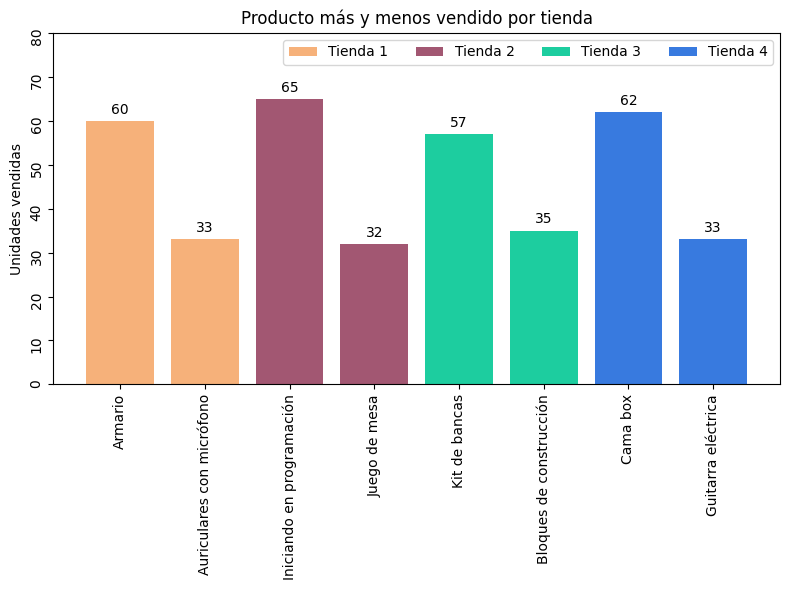

In [109]:
# Rellenar con 0 los productos que tienen NaN
productos_seleccionados = productos_seleccionados.fillna(0)

fig, ax = plt.subplots(figsize=(8,6))
nombres_tiendas2 = productos_seleccionados.columns

for t, c in zip(nombres_tiendas2, colores):
    ax.bar(productos_seleccionados.index, productos_seleccionados[t], color=c, label=t)
    
for contenedor in ax.containers:
    etiquetas1 = [f'{int(bar.get_height())}' if bar.get_height() != 0 else ''
                  for bar in contenedor]    
    ax.bar_label(contenedor, labels = etiquetas1, padding=3, fontsize=10)


ax.set_title('Producto más y menos vendido por tienda')
ax.set_ylabel('Unidades vendidas')
ax.set_ylim(0,80)
ax.tick_params(rotation=90)
ax.legend(ncols=4)

plt.tight_layout()
plt.show()


<div style="background-color:rgb(230, 245, 244); border: 1px solid #116A7B; border-radius: 5px; overflow: hidden;">
  <div style="background-color:rgb(188, 216, 213); color:rgb(17, 82, 91); padding: 6px 10px; font-weight: bold;">
    Conclusiones del análisis de productos más y menos vendidos
  </div>
  <div style="color: #116A7B; padding: 10px;">
    <ul>
        <li>  </li>
    </ul>
  </div>
</div>

#### Envío promedio por tienda

In [35]:
# Análisis del costo de envío a ciudades y el volumen de ventas. Retorno de inversión.

In [36]:
# Mapa de calor de ventas en ciudades / departamentos

### Recomendaciones